In [49]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from typing import List, Tuple, Sequence
import wkw

In [52]:
path_wkw = '../../.data/scMS109_1to7199_v01_subset/8-8-1/'
path_wkw = '/gaba/tmpscratch/webknossos/Connectomics_Department/2018-11-13_scMS109_1to7199_v01_l4_06_24_fixed_mag8/color/1'
dataset = wkw.Dataset.open(path_wkw)
data = dataset.read([20000, 16000, 0], [302, 302, 1])

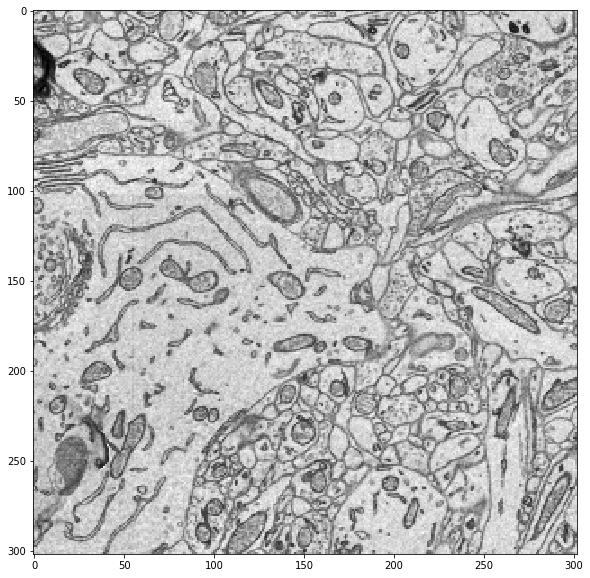

In [53]:
plt.figure(figsize=(12,10))
plt.imshow(data.squeeze(0)[:,:,0], cmap='gray')

In [78]:
class DatasetWKW(Dataset):
    
    def __init__(self,
                 input_root: str, 
                 target_root: str,
                 bboxes: Tuple[Tuple[int, int, int], Tuple[int, int, int]],
                 input_shape: Tuple[int, int, int],
                 output_shape: Tuple[int, int, int],
                 norm_params):
        
        self.input_root = input_root
        self.target_root = target_root
        self.bboxes = bboxes
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.norm_params = norm_params
        self.bbox_mesh_grids = []
        
        self.get_bbox_mesh_grids()
    
    def __len__(self):
        return len(self.data_fnames)
    
    def __getitem__(self, idx):
        pass
    
    def get_bbox_mesh_grids(self):
        for box_idx, box_vals in enumerate(self.bboxes):
            corner_min_target = np.ceil(np.asarray(box_vals[0:3]) + np.asarray(self.input_shape)/2 - np.asarray(self.output_shape)/2).astype(int)
            n_fits = np.floor(np.asarray(box_vals[3:6]) / np.asarray(self.output_shape)).astype(int)
            corner_max_target = corner_min_target + n_fits * np.asarray(self.output_shape)
            x = np.arange(corner_min_target[0], corner_max_target[0], self.output_shape[0])
            y = np.arange(corner_min_target[1], corner_max_target[1], self.output_shape[1])
            z = np.arange(corner_min_target[2], corner_max_target[2], self.output_shape[2])
            xm, ym, zm = np.meshgrid(x, y, z)
            mesh_grid_target = {'x': xm, 'y': ym, 'z': zm}
            mesh_grid_input = {'x': xm, 'y': ym, 'z': zm}
            mesh_grids = {'input': mesh_grid_input, 'target': mesh_grid_target}
            self.bbox_mesh_grids.append(mesh_grids)
    
    def _normalize(self, img):
        img = (np.asarray(img)-self.norm_params['mean'])/self.norm_params['std']
        return img
    
    @staticmethod
    def _reshape_to_torch(img):
        sample = torch.from_numpy(np.reshape(img, (1, img.shape[0], img.shape[1]))).float()
        return sample

In [75]:
input_root = '/gaba/tmpscratch/webknossos/Connectomics_Department/2018-11-13_scMS109_1to7199_v01_l4_06_24_fixed_mag8/color/1'
target_root = input_root
bboxes = (
    (20000, 16000, 0, 700, 700, 10),
    (20000, 16000, 100, 700, 700, 10),
    (20000, 16000, 200, 700, 700, 10),
    )
input_shape = (101, 101, 5)
output_shape = input_size
norm_params = {'mean': 100, 'std':100}
dataset = DatasetWKW(input_root, target_root, bboxes, input_size, output_size, norm_params)

[20000 16000     0] [20604 16604    10]
[20000 16000   100] [20604 16604   110]
[20000 16000   200] [20604 16604   210]


In [76]:
dataset.bbox_mesh_grids

[{'input': {'x': array([[[20000, 20000],
           [20302, 20302]],
   
          [[20000, 20000],
           [20302, 20302]]]),
   'y': array([[[16000, 16000],
           [16000, 16000]],
   
          [[16302, 16302],
           [16302, 16302]]]),
   'z': array([[[0, 5],
           [0, 5]],
   
          [[0, 5],
           [0, 5]]])},
  'target': {'x': array([[[20000, 20000],
           [20302, 20302]],
   
          [[20000, 20000],
           [20302, 20302]]]),
   'y': array([[[16000, 16000],
           [16000, 16000]],
   
          [[16302, 16302],
           [16302, 16302]]]),
   'z': array([[[0, 5],
           [0, 5]],
   
          [[0, 5],
           [0, 5]]])}},
 {'input': {'x': array([[[20000, 20000],
           [20302, 20302]],
   
          [[20000, 20000],
           [20302, 20302]]]),
   'y': array([[[16000, 16000],
           [16000, 16000]],
   
          [[16302, 16302],
           [16302, 16302]]]),
   'z': array([[[100, 105],
           [100, 105]],
   
         

In [66]:
np.asarray(box_vals[0:2])

array([20000, 16000])